In [3]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('./releases/release_v02/')) #for current preprocessing
%load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v02_3 as pts


os.chdir(pts.working_dir() + 'Feature_releases/release_v02')

Populating the interactive namespace from numpy and matplotlib


# Вызов генерации фич

In [4]:
# перечислил все категории, по которым можно сплитовать

categorical_hierahies = [['State', 'Town', u'Agencia_ID'],
                         [ u'Canal_ID'],
                         [u'Ruta_SAK'], 
                         [u'Cliente_ID'], 
                         ['brand', u'Producto_ID']]

In [26]:
reload(pts)

data = pts.preproc(states=['Queretaro de Arteaga'])
data.head()

1 lag done
2 lag done
3 lag done
4 lag done
5 lag done
3-wide lag done
4-wide lag done
5-wide lag done
6-wide lag done


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Log_Demanda,Log_Demanda_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,Log_Demanda_Mean_Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,...,No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean,No_remains_Mean_Producto_ID_Cliente_ID_Town_6mean,No_remains_Mean_Producto_ID_Ruta_SAK_6mean,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean,Venta_hoy_6mean,Venta_hoy_by_uni_6mean,Venta_uni_hoy_6mean
0,1210,5,653039,395.0,0.00,NaN,5.981414,4.791023,6.255725,5.712620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,6.356108,4.791023,6.605798,6.137538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,5.411646,4.791023,5.193466,3.830277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,3.713572,4.791023,4.949039,4.586806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,5.209486,4.791023,5.203316,5.206432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cur_week_feat = [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy']
cur_week_feat = [x for x in cur_week_feat if x in data.columns]


means_by_split = [x for x in data.columns if 'Mean' in x and not(x[-2] == '_' or x[-4:] == 'last')] #its mean, its not a lag
print(means_by_split)
data_for_model = data.drop(cur_week_feat + means_by_split, axis=1).set_index(u'Semana')

X_train = data_for_model.loc[3:7,:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[3:7,:]['Log_Demanda']
X_test = data_for_model.loc[8:9,:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[8:9,:]['Log_Demanda']
X_train.head()

['Log_Demanda_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Town', 'Log_Demanda_Mean_Producto_ID_Ruta_SAK', 'Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID', 'No_remains_Mean_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK', 

,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Ruta_SAK,brand,pieces,weight,Demanda_uni_equil_1,Dev_proxima_1,...,Demanda_uni_equil_6mean,Dev_proxima_6mean,Dev_proxima_by_uni_6mean,Log_Demanda_6mean,Log_Dev_proxima_6mean,Log_Venta_hoy_6mean,No_remains_6mean,Venta_hoy_6mean,Venta_hoy_by_uni_6mean,Venta_uni_hoy_6mean
Semana,,,,,,,,,,,,,,,,,,,,,
3,1210,5,653039,1240,3001,3.0,4.0,125.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,1250,3001,3.0,4.0,105.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,1644,3001,3.0,NaN,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,2261,3001,2.0,NaN,58.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,4280,3001,39.0,NaN,110.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# xgboost

In [28]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 50,
 'subsample': 0.8,
 'colsample_bytree': 0.8
}

xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**param)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

Train: 0.357815711875
Test: 0.360586063236


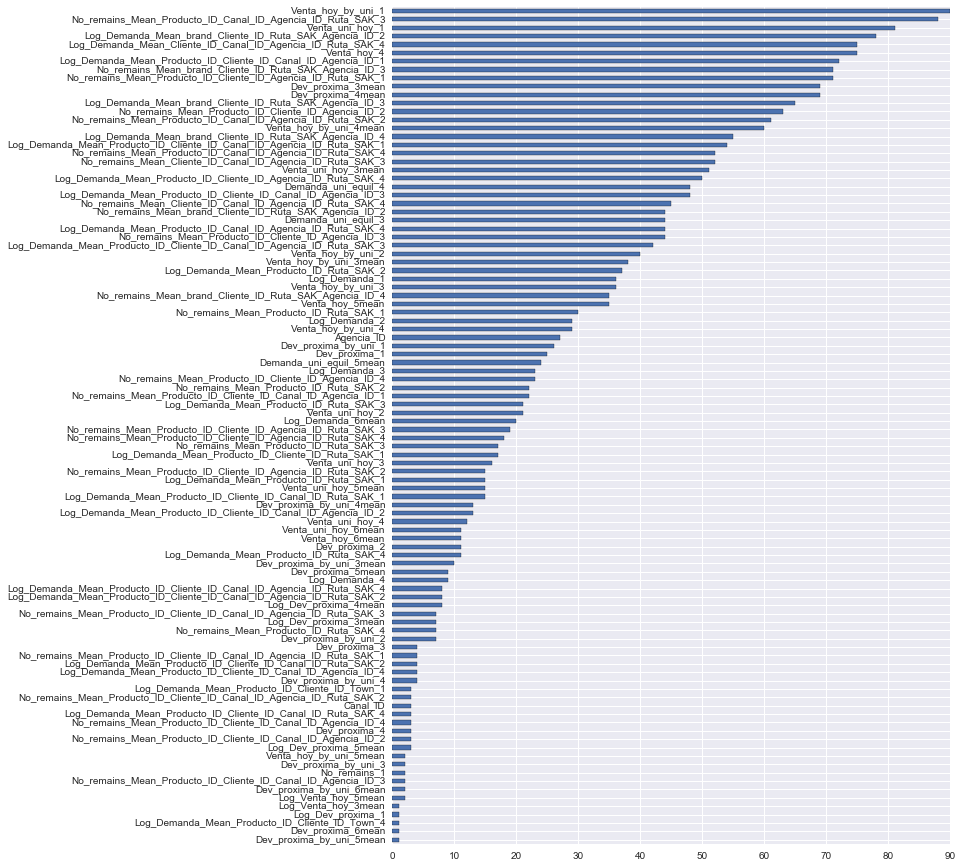

In [29]:
feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values()
feat_imp.head(100).plot.barh(figsize=(10,15))

print('Train:', np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))))

Ура, получилось оттянуть категориальные переменные вниз по важности

In [30]:
feat_imp.sort_values(ascending=False).to_csv('Splits_feature_importancies.csv')

In [31]:
def transformaton_types(feat_list):
    features = pd.DataFrame(feat_list, columns = ['Features'])
    features['Original'] = features['Features']
    features['LagWidth'] = features['Features'].str.extract('(\d)mean', expand=True)
    features.loc[~features.LagWidth.isnull(), 'Original'] = features['Original'].str.replace('_(\d)last', '')
    features['Lag'] = features.loc[features.LagWidth.isnull(), 'Features'].str.extract('_(\d)', expand=True)
    features.loc[~features.Lag.isnull(), 'Original'] = features['Original'].str.replace('_(\d)', '')
    features['Split'] = features['Original'].apply(lambda f: f.split('_Mean_')[1] if '_Mean_' in f else np.nan)
    features['Original'] = features['Features'].apply(lambda f: f.split('_Mean_')[0])
    return features


features = transformaton_types(feat_imp.index)
features['Important'] = features['Features'].isin(feat_imp.head(50).index).astype(int)
features

,Features,Original,LagWidth,Lag,Split,Important
0,Dev_proxima_by_uni_5mean,Dev_proxima_by_uni_5mean,5,NaN,NaN,1
1,Dev_proxima_6mean,Dev_proxima_6mean,6,NaN,NaN,1
2,Log_Demanda_Mean_Producto_ID_Cliente_ID_Town_4,Log_Demanda,NaN,4,Producto_ID_Cliente_ID_Town,1
3,Log_Dev_proxima_1,Log_Dev_proxima_1,NaN,1,NaN,1
4,Log_Venta_hoy_3mean,Log_Venta_hoy_3mean,3,NaN,NaN,1
5,Log_Venta_hoy_5mean,Log_Venta_hoy_5mean,5,NaN,NaN,1
6,Dev_proxima_by_uni_6mean,Dev_proxima_by_uni_6mean,6,NaN,NaN,1
7,No_remains_Mean_Producto_ID_Cliente_ID_Canal_I...,No_remains,NaN,3,Producto_ID_Cliente_ID_Canal_ID_Agencia_ID,1
8,No_remains_1,No_remains_1,NaN,1,NaN,1
9,Dev_proxima_by_uni_3,Dev_proxima_by_uni_3,NaN,3,NaN,1


In [32]:
pd.crosstab(features.Split, features.Important)

Important,0,1
Split,,
Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,8,0
Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK,8,0
Producto_ID_Cliente_ID_Agencia_ID,8,0
Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK,5,3
Producto_ID_Cliente_ID_Canal_ID_Agencia_ID,3,5
Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,2,5
Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK,0,3
Producto_ID_Cliente_ID_Ruta_SAK,0,1
Producto_ID_Cliente_ID_Town,0,2
